## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Importing Libraries

In [ ]:
# Load the TensorBoard notebook extension
# %load_ext tensorboard

In [ ]:
import keras
from keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

# Additional Libraries
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Add, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Tensorboard
import tensorflow as tf
import datetime

# Model
# import the necessary packages
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np

## Defining Model

#### Model 1

In [ ]:
# # Model 1 - Vasu
# def create_model():
#   input_img = keras.Input(shape=(216, 576, 3))

#   # Pre-Built layers
#   x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
#   x = layers.MaxPooling2D((2, 2), padding='same')(x)
#   x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#   x = layers.MaxPooling2D((2, 2), padding='same')(x)
#   x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#   x = layers.MaxPooling2D((2, 2), padding='same')(x)
#   x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#   x = layers.MaxPooling2D((3, 3), padding='same')(x)

#   ## New Layers
#   # x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#   # x = layers.MaxPooling2D((3, 3), padding='same')(x)
#   # x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#   encoded = layers.MaxPooling2D((3, 3), activation='sigmoid', padding='same')(x)

#   # at this point the representation is (4, 4, 8) i.e. 128-dimensional

#   ## New Layers
#   # x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
#   # x = layers.UpSampling2D((3, 3))(x)
#   # x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#   # x = layers.UpSampling2D((3, 3))(x)

#   # Pre-Built layers
#   x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#   x = layers.UpSampling2D((3, 3))(x)
#   x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#   x = layers.UpSampling2D((2, 2))(x)
#   x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#   x = layers.UpSampling2D((2, 2))(x)
#   x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#   x = layers.UpSampling2D((2, 2))(x)
#   decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

#   autoencoder = keras.Model(input_img, decoded)
#   autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])

#   return autoencoder

In [ ]:
# model = create_model()
# model.summary()

#### Model 2

In [ ]:
def create_model():
  Input_img = keras.Input(shape=(216, 576, 3))  
    
  # encoding architecture
  x1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(Input_img)
  x2 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x1)
  x3 = MaxPool2D(padding='same')(x2)
  x4 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x3)
  x5 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x4)
  x6 = MaxPool2D(padding='same')(x5)
  encoded = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x6)
  # encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
  # decoding architecture
  x7 = UpSampling2D()(encoded)
  x8 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x7)
  x9 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x8)
  x10 = Add()([x5, x9])
  x11 = UpSampling2D()(x10)
  x12 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x11)
  x13 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x12)
  x14 = Add()([x12, x13])
  # x3 = UpSampling2D((2, 2))(x3)
  # x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
  # x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
  decoded = Conv2D(3, (3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l1(10e-10))(x14)
  autoencoder = Model(Input_img, decoded)
  autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

  return autoencoder

In [ ]:
# model = create_model()
# model.summary()

#### Model 3

In [ ]:
def create_model():
  # initialize the input shape to be "channels last" along with
  # the channels dimension itself
  # channels dimension itself
  inputShape = (216, 576, 3)
  chanDim = -1
  filters = [32, 64]
  latentDim = 16
  depth = 3

  # define the input to the encoder
  inputs = Input(shape=inputShape)
  x = inputs

  # loop over the number of filters
  for f in filters:
    # apply a CONV => RELU => BN operation
    x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(axis=chanDim)(x)

  # flatten the network and then construct our latent vector
  volumeSize = K.int_shape(x)
  x = Flatten()(x)
  latent = Dense(latentDim)(x)

  # build the encoder model
  encoder = Model(inputs, latent, name="encoder")

  # start building the decoder model which will accept the
  # output of the encoder as its inputs
  latentInputs = Input(shape=(latentDim,))
  x = Dense(np.prod(volumeSize[1:]))(latentInputs)
  x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)

  # loop over our number of filters again, but this time in
  # reverse order
  for f in filters[::-1]:
    # apply a CONV_TRANSPOSE => RELU => BN operation
    x = Conv2DTranspose(f, (3, 3), strides=2,
      padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(axis=chanDim)(x)

  # apply a single CONV_TRANSPOSE layer used to recover the
  # original depth of the image
  x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
  outputs = Activation("sigmoid")(x)

  # build the decoder model
  decoder = Model(latentInputs, outputs, name="decoder")

  # our autoencoder is the encoder + decoder
  autoencoder = Model(inputs, decoder(encoder(inputs)),
    name="autoencoder")

  opt = Adam(lr=1e-3)
  autoencoder.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), optimizer=opt, metrics=['accuracy'])

  return autoencoder

In [ ]:
model = create_model()
model.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 216, 576, 3)]     0         
_________________________________________________________________
encoder (Functional)         (None, 16)                7982416   
_________________________________________________________________
decoder (Functional)         (None, 216, 576, 3)       8516931   
Total params: 16,499,347
Trainable params: 16,498,963
Non-trainable params: 384
_________________________________________________________________


In [ ]:
# To delete the above defined model
del model

### Importing Data

1. Input Data

Checking one Image

In [ ]:
img_trial = cv2.imread('/content/drive/Shared drives/drive 4/Carla Dataset/Ground Truth/950.png')
print(img_trial)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
img_trial = cv2.resize(img_trial, (0,0), fx=0.3, fy=0.3)

In [ ]:
img_trial.shape

(216, 576, 3)

Whole Data

In [ ]:
dataset_path = '/content/drive/Shared drives/drive 4/Carla Dataset/Input/'

input = []
#4989
for i in range(1000):
  img = cv2.imread(dataset_path+str(i)+'.png')
  
  # If the image doesn't exist, skip
  if img is None:
    continue
  
  else:
    img = cv2.resize(img, (0, 0), fx=0.3, fy=0.3)
    input.append(img)

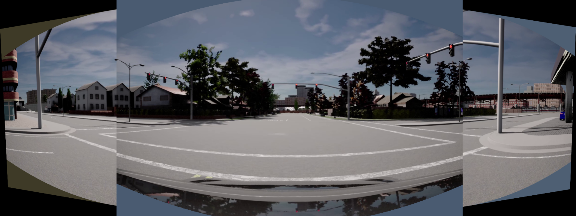

In [ ]:
# Checking a random input sample
cv2_imshow(input[88])

In [ ]:
# Random input sample size
input[90].shape

(216, 576, 3)

In [ ]:
# Checking for null values
len(input)

1000

2. Ground Truth

In [ ]:
dataset_path = '/content/drive/Shared drives/drive 4/Carla Dataset/Ground Truth/'

ground_truth = []
#4842
for i in range(1000):
  img = cv2.imread(dataset_path+str(i)+'.png')
  
  # If the image doesn't exist, skip
  if img is None:
    continue
  
  else:
    img = cv2.resize(img, (0, 0), fx=0.3, fy=0.3)
    ground_truth.append(img)

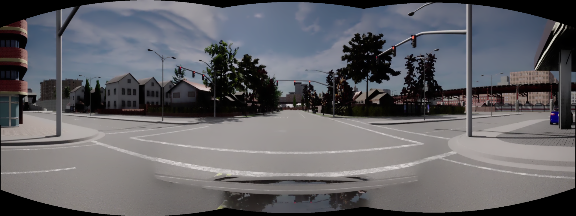

In [ ]:
# Checking random input image
cv2_imshow(ground_truth[99])

In [ ]:
# Random GT size
ground_truth[80].shape

(216, 576, 3)

In [ ]:
# Checking for null values
len(ground_truth)

954

#### X and Y

In [ ]:
entries_req = len(ground_truth)
input = np.asarray(input)
ground_truth = np.asarray(ground_truth)

In [ ]:
input[:entries_req,:].shape

(954, 216, 576, 3)

In [ ]:
x = input[:entries_req,:]
y = ground_truth

#### Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainX,testX,trainy,testy = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
# initialize the number of epochs to train for and batch size
EPOCHS = 1500
BS = 32
# load the MNIST dataset
print("[INFO] loading dataset...")

# add a channel dimension to every image in the dataset, then scale
# the pixel intensities to the range [0, 1]
# trainX = np.expand_dims(trainX, axis=-1)
# testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] loading dataset...


In [ ]:
print(f"Number of Epochs : {EPOCHS}")
print(f"Shape of trainX : {trainX.shape}")

Number of Epochs : 1500
Shape of trainX : (715, 216, 576, 3)


#### Checkpoint Code

In [ ]:
# Checkpoint location
model_no = 6
version_no = 3

## 1. To save the model only after the best results every once in a while
# model_checkpoint = ModelCheckpoint(filepath=f"/content/drive/Shared drives/drive 4/Carla Dataset/Models/model{model_no}_V00{version_no}.h5", verbose=1, save_best_only=True)

## 2. To save the model after every Epoch regardless of metrics
model_checkpoint = ModelCheckpoint(filepath=f"/content/drive/Shared drives/drive 4/Carla Dataset/Models/model{model_no}_V00{version_no}.h5", verbose=1, save_freq=50)

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
# '''
# Run if you have a pretrained model and want to continue tranining
# '''
def load_trained_model(model_path):
  #  model = create_model()
   print("Loading...\n",model_path)
   model_loaded = keras.models.load_model(model_path)

   return model_loaded

To load the model

In [ ]:
model_no_to_be_loaded = model_no
version_no_to_be_loaded = version_no - 1

# Delete the model if any is already compiled/built
del model

# Load the trained model
# model = load_trained_model(f'/content/drive/Shared drives/drive 4/Carla Dataset/Models/model{model_no_to_be_loaded}_V00{version_no_to_be_loaded}.hdf5')
model = load_trained_model(f'/content/drive/Shared drives/drive 4/Carla Dataset/Models/model{model_no_to_be_loaded}_V00{version_no_to_be_loaded}.h5')

Loading...
 /content/drive/Shared drives/drive 4/Carla Dataset/Models/model6_V002.h5


In [ ]:
model.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 216, 576, 3)]     0         
_________________________________________________________________
encoder (Functional)         (None, 16)                7982416   
_________________________________________________________________
decoder (Functional)         (None, 216, 576, 3)       8516931   
Total params: 16,499,347
Trainable params: 16,498,963
Non-trainable params: 384
_________________________________________________________________


1. Learning Rate

In [ ]:
## Checking the Learning Rate of the model
print("[INFO] old learning rate: {}".format(keras.backend.get_value(model.optimizer.lr)))

## To change Learning rate value
keras.backend.set_value(model.optimizer.lr, 1e-2)
print("[INFO] new learning rate: {}".format(keras.backend.get_value(model.optimizer.lr)))

[INFO] old learning rate: 0.0010000000474974513
[INFO] new learning rate: 0.009999999776482582


In [ ]:
# construct our convolutional autoencoder
print("[INFO] building autoencoder...")

# log_dir = "/content/drive/Shared drives/drive 4/Carla Dataset/Models/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# train the convolutional autoencoder
H = model.fit(
	trainX, trainy,
	validation_data=(testX, testy),
	# steps_per_epoch=len(trainX) // 64,
	epochs=EPOCHS,
	batch_size=BS,
	callbacks=[model_checkpoint]
	)

[INFO] building autoencoder...
Epoch 1/1500
23/23 [==============================] - 9s 387ms/step - loss: 13.6475 - accuracy: 0.4189 - val_loss: 13.7375 - val_accuracy: 0.4233
Epoch 2/1500
23/23 [==============================] - 8s 350ms/step - loss: 13.6344 - accuracy: 0.4243 - val_loss: 13.7403 - val_accuracy: 0.4209
Epoch 3/1500
 3/23 [==>...........................] - ETA: 5s - loss: 13.6093 - accuracy: 0.4255
Epoch 00003: saving model to /content/drive/Shared drives/drive 4/Carla Dataset/Models/model6_V003.h5
23/23 [==============================] - 9s 382ms/step - loss: 13.6344 - accuracy: 0.4236 - val_loss: 13.7270 - val_accuracy: 0.4168
Epoch 4/1500
23/23 [==============================] - 8s 351ms/step - loss: 13.6344 - accuracy: 0.4236 - val_loss: 13.6799 - val_accuracy: 0.4194
Epoch 5/1500
 7/23 [========>.....................] - ETA: 4s - loss: 13.6554 - accuracy: 0.4211
Epoch 00005: saving model to /content/drive/Shared drives/drive 4/Carla Dataset/Models/model6_V003.h5


In [ ]:
# %tensorboard --logdir logs/fit

#### Save the model

In [ ]:
# # To save the model
model.save(f"/content/drive/Shared drives/drive 4/Carla Dataset/Models/model{model_no}_V00{version_no}.h5")

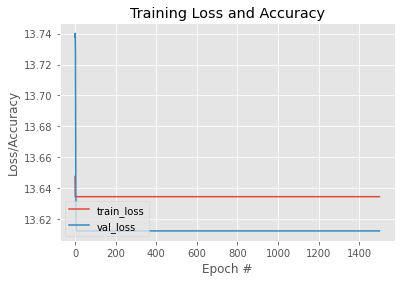

In [ ]:
# construct a plot that plots and saves the training history
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(f'/content/drive/Shared drives/drive 4/Carla Dataset/Models/model{model_no}_V00{version_no}.jpg')

Results

In [ ]:
results = model.evaluate(trainX, trainy)
print('training_loss, training_accuracy', results)

23/23 [==============================] - 3s 136ms/step - loss: 13.6344 - accuracy: 0.4254
training_loss, training_accuracy [13.634434700012207, 0.4254398047924042]


In [ ]:
results = model.evaluate(testX, testy)
print('testing_loss, testing_accuracy', results)

8/8 [==============================] - 1s 118ms/step - loss: 13.6123 - accuracy: 0.4246
testing_loss, testing_accuracy [13.612265586853027, 0.42461735010147095]


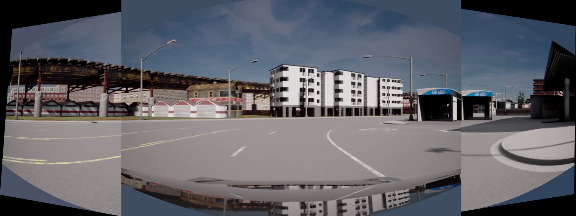

In [ ]:
cv2_imshow(testX[0]*255)

In [ ]:
testX = testX*255

In [ ]:
# use the convolutional autoencoder to make predictions on the
# testing images, then initialize our list of output images
print("[INFO] making predictions...")
decoded = model.predict(testX)
outputs = None

# # loop over our number of output samples
for i in range(0, 8):
	# grab the original image and reconstructed image
	original = (testX[i]).astype('uint8')
	recon = (decoded[i]*255).astype('uint8')
 
	# stack the original and reconstructed image side-by-side
	output = np.hstack([original, recon])
 
	# if the outputs array is empty, initialize it as the current
	# side-by-side image display
	if outputs is None:
		outputs = output
	# otherwise, vertically stack the outputs
	else:
		outputs = np.vstack([outputs, output])

# # Save the outputs image to disk
output_path = f'/content/drive/Shared drives/drive 4/Carla Dataset/Trial/output{model_no}_V00{version_no}.png'
cv2.imwrite(output_path, outputs)
# cv2_imshow(outputs)

# cv2_imshow(decoded[0])

[INFO] making predictions...


True

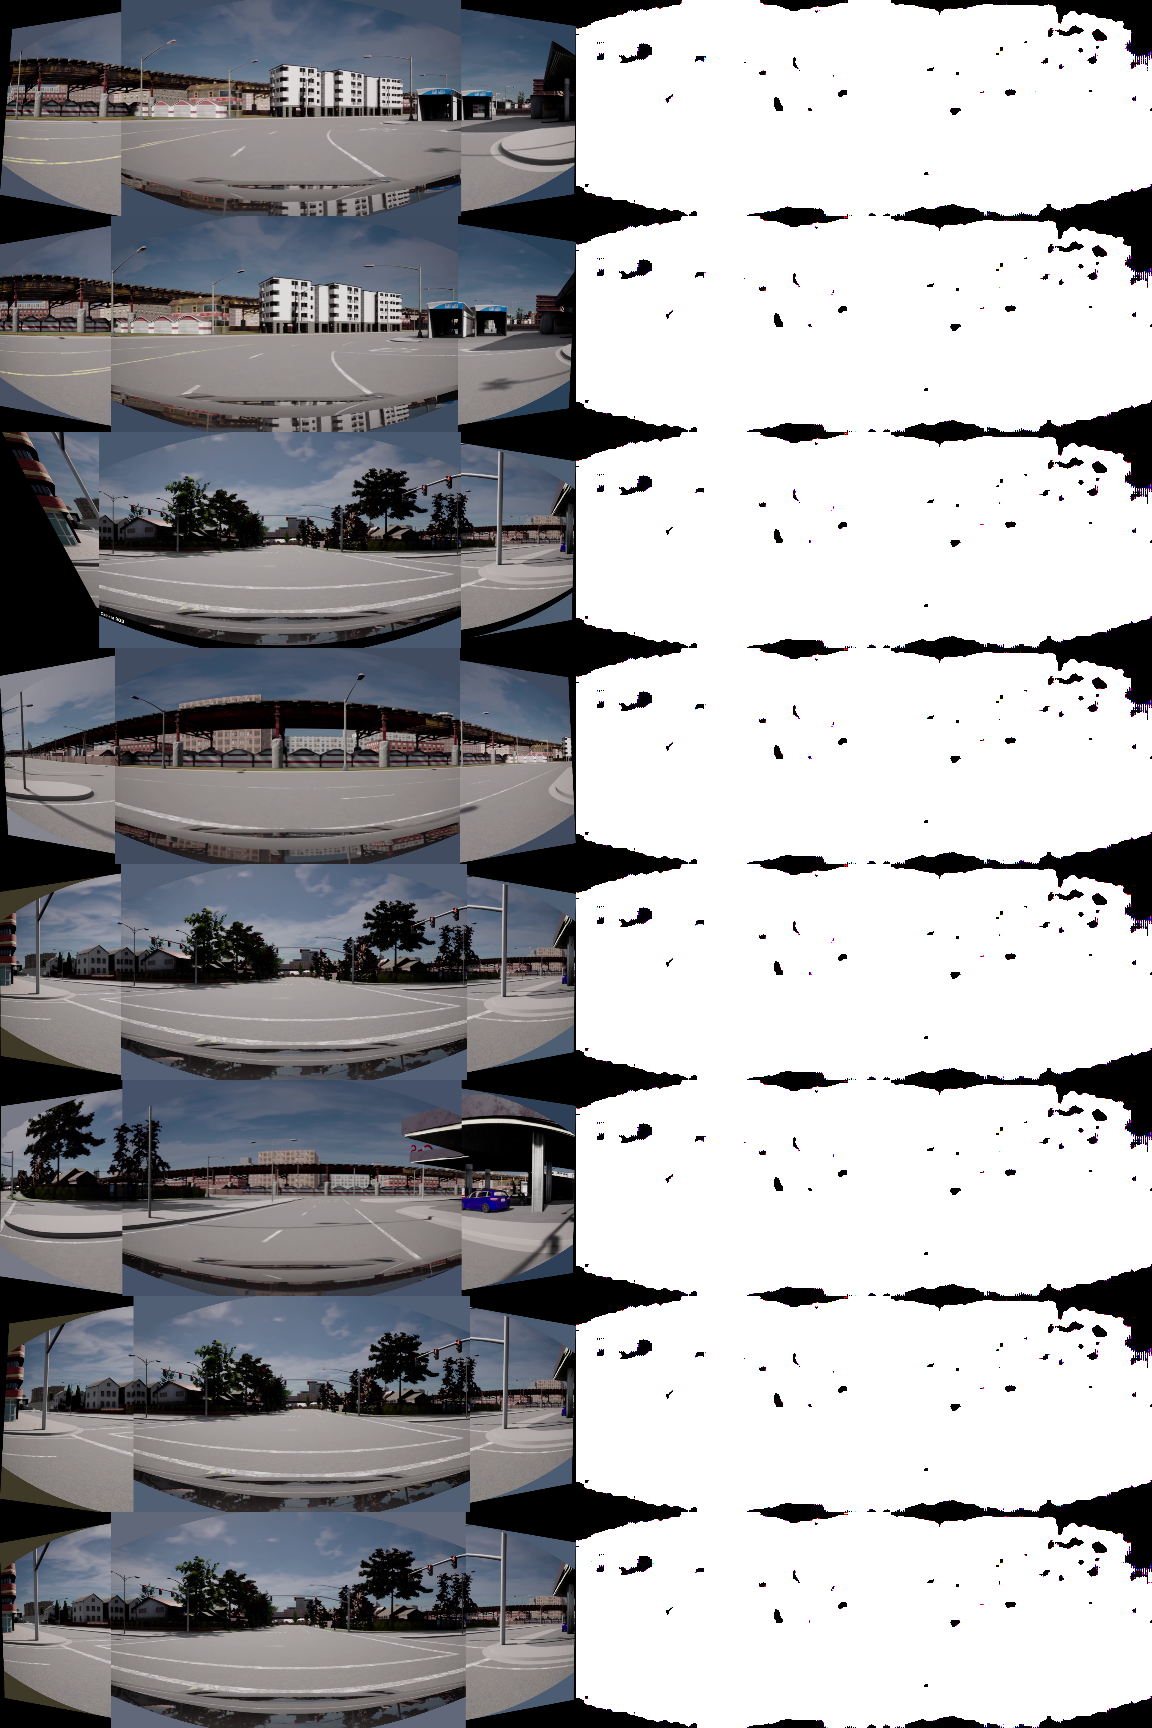

In [ ]:
# Checking the image
output_img = cv2.imread(f'/content/drive/Shared drives/drive 4/Carla Dataset/Trial/output{model_no}_V00{version_no}.png')
cv2_imshow(output_img)